___

# Machine Learning in Geosciences ] 
Department of Applied Geoinformatics and Carthography, Charles University

Lukas Brodsky lukas.brodsky@natur.cuni.cz


## Exercise: Boosting Early Stopping technique

This notebook is dedicated to early stopping in boosting model . 

**Objective**:
Understand and implement different ensemble learning techniques—Bagging, Boosting, and Stacking—on a real-world dataset and compare their performance.

Tasks: 
1. Implement Gradient Boosting algorithm based on sklearn `GradientBoostingRegressor` class. 
2. Run boosting model with up to 200 estimators and measure testing error. 
3. Implement **Early stoping** procedure and plot the model performance with the indicator of the stopped boosting. 

In [1]:
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt

In [2]:
np.random.seed(42)

In [3]:
# Data 
np.random.seed(42)
X = np.random.rand(100, 1) - 0.5
y = 3*X[:, 0]**2 + 0.05 * np.random.randn(100)

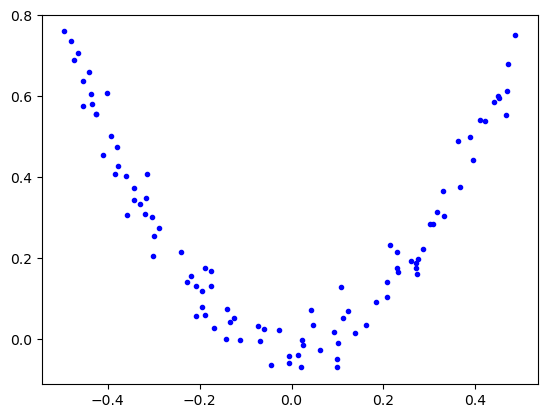

In [4]:
plt.plot(X, y, 'b.')

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=49)

### Gradient Boosting Model - error evolution

**To implement:** 

`
Algorithm GradientBoosting:
Initialize GradientBoostingRegressor with:
        max_depth = 2
        warm_start = True
        random_state = 42

    Initialize train_err as an empty list
    Initialize test_err as an empty list

    For n_estimators from 1 to 199 do:
        Set gbrt.n_estimators to n_estimators
        Train gbrt using X_train and y_train

        // Compute training error
        Predict y_train_pred using gbrt on X_train
        Compute train_error as mean squared error between y_train and y_train_pred
        Append train_error to train_err list

        // Compute test error
        Predict y_pred using gbrt on X_test
        Compute test_error as mean squared error between y_test and y_pred
        Append test_error to test_err list
End Algorithm
`

In [6]:
# Measure validation error of Boosting model with up to 200 estimators 
gbrt = GradientBoostingRegressor(max_depth=2, warm_start=True, random_state=42)
train_err = []
test_err = []



In [7]:
for est in range(1, 200):
    gbrt.n_estimators = est
    gbrt.fit(X_train, y_train)
    train_err.append(mean_squared_error(y_train, gbrt.predict(X_train)))
    test_err.append(mean_squared_error(y_test, gbrt.predict(X_test)))

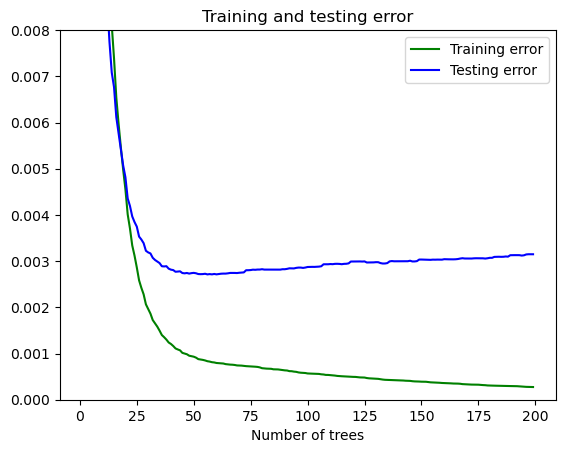

In [8]:
# Plot the evolution of the validation errors 
plt.plot(list(range(1, 200)), train_err, 'g-', label='Training error')
plt.plot(list(range(1, 200)), test_err, 'b-', label='Testing error')
plt.ylim(0.0, 0.008)
plt.xlabel('Number of trees')
plt.title('Training and testing error')
plt.legend()

## When to stop the model learning?

.

### Implement early stopping procedure with parameter testing error going up = 5 to find the best!

Stop after model testing error increses for **five times** in the iterative learning!

**Early stopping:**

`
Algorithm EarlyStopping:
    If val_error < min_val_error Then:
        Set min_val_error to val_error
        Set error_going_up to 0
    Else:
        Increment error_going_up by 1
        If error_going_up equals 5 Then:
            Break the loop
End Algorithm
`

In [47]:
# Run the early stopping algorithm 
# mean_squared_error(y_test, y_pred)
# min_val_error = float("inf") 
# add error_going_up = 0 
train_err = []
test_err = []
min_val_error = float("inf")
error_going_up = 0
gbrt = GradientBoostingRegressor(max_depth=2, warm_start=True, random_state=42)
for n_est in range(1, 200):
    gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=n_est, warm_start=True, random_state=42)

    gbrt.fit(X_train, y_train)

    train_mse = mean_squared_error(y_train, gbrt.predict(X_train))
    test_mse = mean_squared_error(y_test, gbrt.predict(X_test))
    train_err.append(train_mse)
    test_err.append(test_mse)
    y_pred = gbrt.predict(X_test)
    val_error = mean_squared_error(y_test, y_pred)
    if val_error < min_val_error:
        min_val_error = val_error
        error_going_up = 0
    else:
        error_going_up += 1
        if error_going_up == 5:
            stop = n_est
            print('Early stopping at', n_est)
            

Early stopping at 61


In [48]:
print(gbrt.n_estimators)

199


In [49]:
train_err

[0.05014778466687881,
 0.04230293098773478,
 0.035915798324299454,
 0.03053631767648031,
 0.026570666766095877,
 0.022857320666617883,
 0.01966190895985457,
 0.01697774409967647,
 0.014721027171218768,
 0.012919451796451074,
 0.011511761061518234,
 0.010185748231447755,
 0.009039599835039526,
 0.008111219633948865,
 0.007388357216407519,
 0.006542027536714087,
 0.005975190990563216,
 0.005461108373533615,
 0.004985556107485903,
 0.004554673437984194,
 0.004012157592568705,
 0.003705773230831851,
 0.0033387926817897515,
 0.0031194656395993835,
 0.0028637051286540772,
 0.0025844870298732236,
 0.0024220280043346504,
 0.002280990345573686,
 0.002064940407002032,
 0.001961476982254674,
 0.0018628057796943132,
 0.001724764975980425,
 0.001653243459876446,
 0.0015817618985448465,
 0.0014948669978697737,
 0.001400207983053234,
 0.0013534767117368057,
 0.001301154573951783,
 0.0012385090300860958,
 0.0012064734701141098,
 0.001162626421142418,
 0.0011100456807487053,
 0.0010879581842084237,
 0.

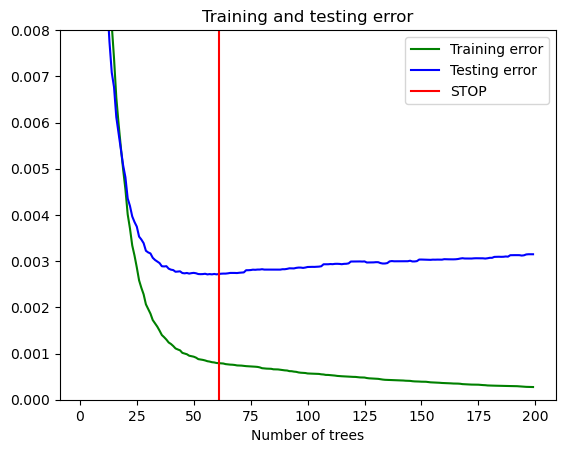

In [50]:
# Plot the evolution of the validation errors 
plt.plot(list(range(1, 200)), train_err, 'g-', label='Training error')
plt.plot(list(range(1, 200)), test_err, 'b-', label='Testing error')
plt.axvline(stop, color = 'red', label = 'STOP')
plt.ylim(0.0, 0.008)
plt.xlabel('Number of trees')
plt.title('Training and testing error')
plt.legend()

In [ ]:
# model plot data 
X_sim = np.linspace(-0.5, 0.5, 100)
y_sim = gbrt.predict(X_sim.reshape(-1, 1))

NameError: name 'X_sim' is not defined

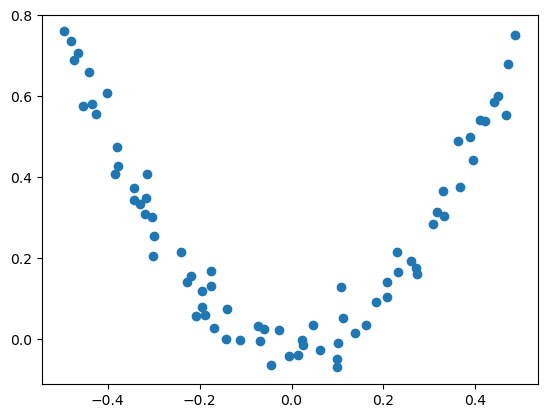

In [52]:
# Model prediction plot 
plt.scatter(X_train, y_train, label='data points')
plt.plot(X_sim, y_sim, 'r-', label='GBRT model')

plt.legend()